# Purpose
1. 請為客戶進行貼標，並依其特性進行命名，以幫助行銷部門推出新產品和制定行銷方式。
2. 請先進行降維後再分群(依你的判斷選擇降維和分群的方法)

In [55]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib.font_manager import FontProperties
warnings.filterwarnings("ignore")

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# 1. import data

In [45]:
df = pd.read_csv('segmentation_data.csv')
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [5]:
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

#### ID：顯示客戶的唯一標識。

#### Sex：
0：男性        
1：女性        

#### Marital status：客戶的婚姻狀況。
0：單人        
1：非單身（離婚/分居/已婚/喪偶）        

#### Age：客戶的年齡（以年為單位），計算方法為當年減去創建數據集時客戶的出生年份
18 最小值（數據集中觀察到的最低年齡）        
76 最大值（數據集中觀察到的最高年齡）        

#### Education：客戶的教育水準。
0：其他/未知        
1：高中        
2：大學        
3：研究生院        

#### Income：客戶以美元自我報告的年收入。
35832 最小值（數據集中觀察到的最低收入）        
309364 最大值（數據集中觀察到的最高收入）        

#### Occupation ：客戶的職業類別。
0：失業 / unskilled        
1：skilled employee / official        
2：management / self-employed / highly qualified employee / officer        

#### Settlement size：客戶居住城市的規模。
0：小城市        
1：中等城市        
2：大城市        

In [6]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [ ]:

# 將ID以外的特徵全取出
X = df.iloc[:, 1:] 

# 使用 scikit-learn 內建的 API 標準化
scaler = StandardScaler()
Z_sk = scaler.fit_transform(X)

      Sex  Marital status  Age  Education  Income  Occupation  Settlement size
mean -0.0             0.0  0.0       -0.0     0.0         0.0              0.0
std   1.0             1.0  1.0        1.0     1.0         1.0              1.0


In [10]:
# 更新 DataFrame
df.iloc[:, 1:] = Z_sk
df.head()


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326
1,100000002,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326
2,100000003,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730
3,100000004,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298
4,100000005,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298


In [11]:
# 顯示各特徵的平均與標準差
df_stats = df.describe().loc[['mean', 'std']]
df_stats.round(2)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
mean,1.000010e+08,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0
std,5.774900e+02,1.0,1.0,1.0,1.0,1.0,1.0,1.0


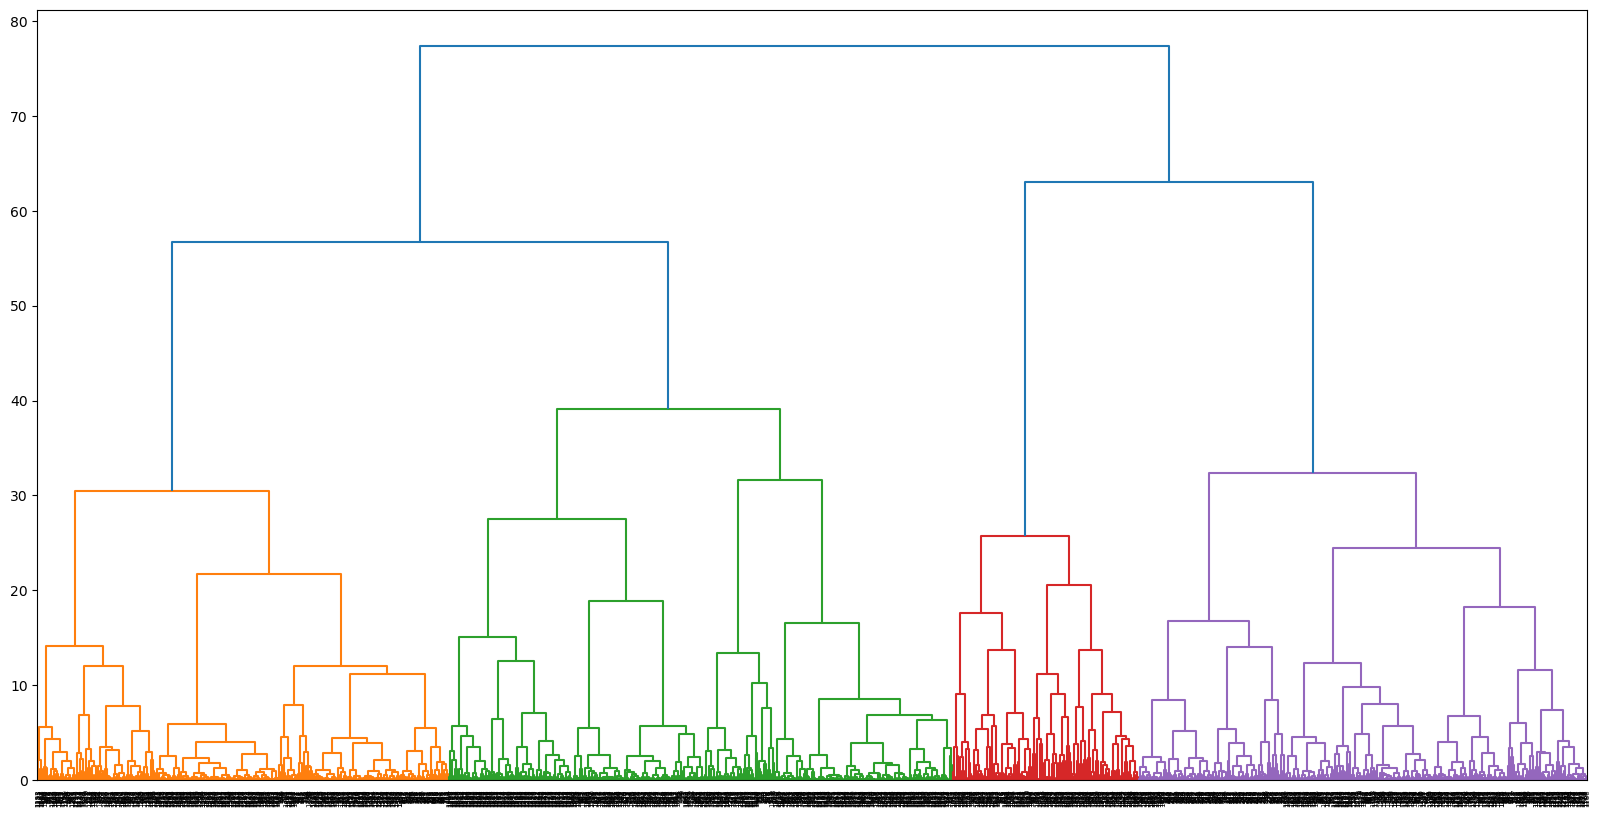

In [57]:
data_scaled=pd.DataFrame(Z_sk,columns=X.columns)

# Ward method
plt.figure(figsize = (20,10))
mergings = linkage(data_scaled, method='ward',metric='euclidean')
dendrogram(mergings)
plt.show()

In [ ]:
# PCA

In [ ]:
# 前5大主成分各自解釋數值的變異
pca_5d = PCA(5, random_state=123)
pca_5d.fit(Z_sk)
np.round(pca_5d.explained_variance_ratio_, 2)

array([0.36, 0.26, 0.19, 0.08, 0.06])

In [34]:
sum(pca_5d.explained_variance_ratio_.tolist()[:4]) # 前2大主成分就已解釋了數值中約9成的差異

0.8832611508521909

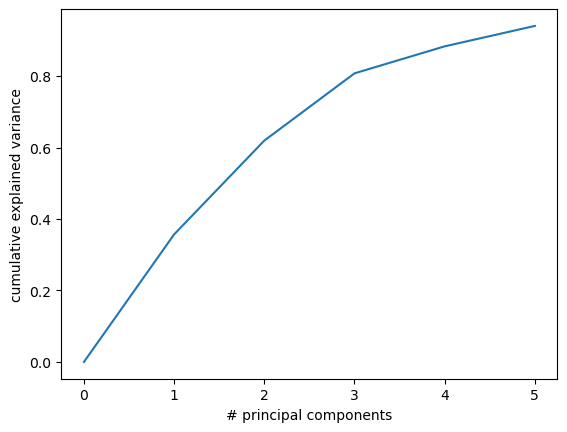

In [ ]:
# 計算累積解釋量 (加上 0 是為了讓圖從座標原點開始)
# 第一個位置為第一主成份的變異，所以要加0在第一個位置
var_plot = [0] + pca_5d.explained_variance_ratio_.tolist()

cum_explained_var_ratio = np.cumsum(var_plot)
plt.plot(cum_explained_var_ratio)
plt.xlabel('# principal components')
plt.ylabel('cumulative explained variance');

In [48]:
# 依照eigenvalue的大小排序共變異數矩陣的eigenvectors
# 做第2次PCA，依照上次PCA得知4個主成分可解釋約6成差異
pca = PCA(n_components=4, random_state=123)

# 注意我們是對標準化後的特徵做PCA
# 將標準化後的數據進行降維轉換
pca_trans = pca.fit_transform(Z_sk)


In [51]:
pcs = np.array(pca.components_)

df_pc = pd.DataFrame(pcs, columns=df.columns[1:])
df_pc.index = [f"{c}" for c in[' 中年高收入 ', ' 中年普通收入 ', ' 老年普通收入 ', ' 青年低收入 ']] 
df_pc.style\
    .background_gradient(cmap='PuBu', axis=None)\
    .format("{:.2}")


,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
中年高收入,-0.31,-0.19,0.33,0.16,0.52,0.49,0.46
中年普通收入,0.46,0.51,0.31,0.64,0.12,0.015,-0.07
老年普通收入,-0.29,-0.44,0.61,0.28,-0.17,-0.4,-0.3
青年低收入,-0.32,0.28,-0.0095,0.18,-0.48,-0.28,0.69


Text(0.5, 1.0, 'PCA Visualization: Factor 1 vs Factor 2')

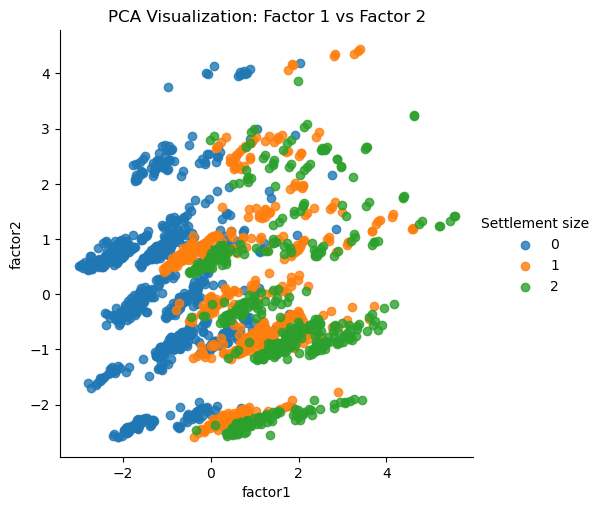

In [54]:
# 將降維後的 Factor 1 與 Factor 2 取出，建立新的 DataFrame
factor_tb = pd.DataFrame(pca_trans[:, :2], columns=['factor1', 'factor2'])

# 將結果與原始類別欄位（Settlement size）合併
df_final = pd.concat([df[['Settlement size']].reset_index(drop=True), factor_tb], axis=1)

# 繪圖：依據居住城市大小（Settlement size）上色
sns.lmplot(data=df_final, x='factor1', y='factor2', hue='Settlement size', 
           fit_reg=False, legend=True)
plt.title('PCA Visualization: Factor 1 vs Factor 2')

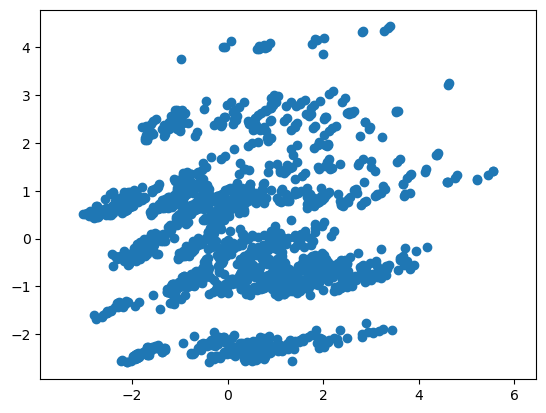

In [24]:
# 第一主成分顯示在 x 軸，第二主成分在 y 軸
plt.scatter(pca_trans[:, 0], pca_trans[:, 1])
plt.axis('equal');

In [ ]:
factor_tb = pd.DataFrame(pca_trans, columns=['factor1', 'factor2', 'factor3', 'factor4']) 

df_factor_tb = pd.concat([df.reset_index(drop=True), factor_tb], axis=1)
df_factor_tb

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,factor1,factor2
0,100000001,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326,2.514746,0.834122
1,100000002,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326,0.344935,0.598146
2,100000003,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730,-0.651063,-0.680093
3,100000004,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298,1.714316,-0.579927
4,100000005,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298,1.626745,-0.440496
...,...,...,...,...,...,...,...,...,...,...
1995,100001996,1.090038,-0.993024,0.946616,-0.063372,0.067471,-1.269525,-0.909730,-0.866034,0.298330
1996,100001997,1.090038,1.007025,-0.760382,-0.063372,-0.084265,0.296823,-0.909730,-1.114957,0.794727
1997,100001998,-0.917399,-0.993024,-0.418983,-1.731068,-0.906957,-1.269525,-0.909730,-1.452298,-2.235937
1998,100001999,1.090038,1.007025,-1.016432,-0.063372,-0.603329,-1.269525,-0.909730,-2.241453,0.627108
